In [8]:
import torch
import matplotlib.pyplot as plt

from src.manifolds.deformed_sum_of_gaussian_pullback_manifold.multi_quadratic_banana_pullback_manifold import MultiQuadraticBananaPullbackManifold
# from src.riemannian_autoencoder.deformed_gaussian_riemannian_autoencoder import DeformedGaussianRiemannianAutoencoder

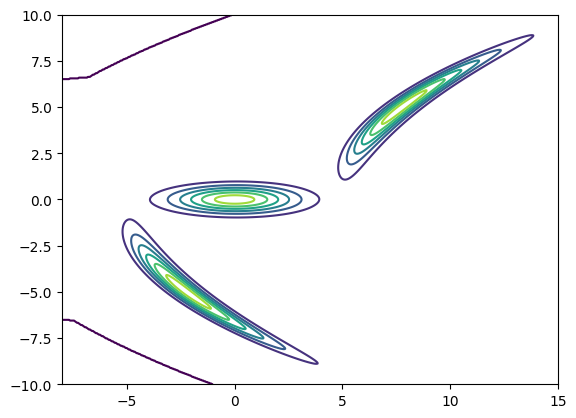

In [9]:
double_banana_manifold = MultiQuadraticBananaPullbackManifold()

xx = torch.linspace(-8.0, 15.0, 500)
yy = torch.linspace(-10.0, 10.0, 500)
x_grid, y_grid = torch.meshgrid(xx, yy)

xy_grid = torch.zeros((*x_grid.shape,2))
xy_grid[:,:,0] = x_grid
xy_grid[:,:,1] = y_grid

density_banana = torch.exp(double_banana_manifold.dsg.log_density(xy_grid.reshape(-1,2)).reshape(x_grid.shape))
plt.contour(x_grid, y_grid, density_banana)
plt.show()

In [10]:
# special points
x0 = torch.tensor([10.,7.])
x1 = torch.tensor([1.,-7.5])

# boundary value parameters
num_bv_intervals = 20
num_bv_time_points = 200 
num_bv_epochs = 1000
bv_lr = 1e-4

# initial value parameters
num_iv_intervals = 400

# initialization
num_sines = 4

In [11]:
# # test barycentre # TODO this might be very hard to compute...
# x=torch.zeros((3,2))
# x[0] = x0
# x[1] = x1
# x[2] = x2

# barycentre = double_banana_manifold.barycentre(x).detach().numpy()

# plt.contour(x_grid, y_grid, density_banana)
# plt.scatter(torch.tensor([x0[0], x1[0], x2[0]]), torch.tensor([x0[1], x1[1], x2[1]]))
# plt.scatter(barycentre[0], barycentre[1], color="orange")
# plt.savefig("results/quadratic_double_banana/barycentre.eps")
# plt.show()

In [12]:
# test inner
X = torch.eye(2)

inner_0 = double_banana_manifold.inner(torch.zeros(2)[None], X[None], X[None])
inner_x0 = double_banana_manifold.inner(x0[None], X[None], X[None])
inner_x1 = double_banana_manifold.inner(x1[None], X[None], X[None])

print(inner_0)
print(inner_x0)
print(inner_x1)

tensor([[[ 0.0625,  0.0000],
         [ 0.0000, 16.0000]]])
tensor([[[ 16.0000, -24.8889],
         [-24.8889,  38.7785]]])
tensor([[[16.0000, 26.6667],
         [26.6667, 44.5069]]])


Epoch 0, Loss 46.7703971862793, Validation 83.59716796875
Epoch 10, Loss 27.13387680053711, Validation 314.82135009765625
Epoch 20, Loss 17.644834518432617, Validation 176.23544311523438
Epoch 30, Loss 16.355876922607422, Validation 108.93646240234375
Epoch 40, Loss 12.72783374786377, Validation 51.26856994628906
Epoch 50, Loss 9.594427108764648, Validation 16.638168334960938
Epoch 60, Loss 9.688034057617188, Validation 17.787010192871094
Epoch 70, Loss 9.50395393371582, Validation 17.771896362304688
Epoch 80, Loss 9.424954414367676, Validation 14.869247436523438
Epoch 90, Loss 9.391067504882812, Validation 15.146156311035156
Epoch 0, Loss 106.18563842773438, Validation 18.102577209472656
Epoch 10, Loss 89.75756072998047, Validation 3.5436477661132812
Epoch 20, Loss 88.44306182861328, Validation 1.5106658935546875
Epoch 30, Loss 88.0054702758789, Validation 1.050079345703125
Epoch 40, Loss 87.8492431640625, Validation 0.8594894409179688
Epoch 50, Loss 87.68437194824219, Validation 0.52

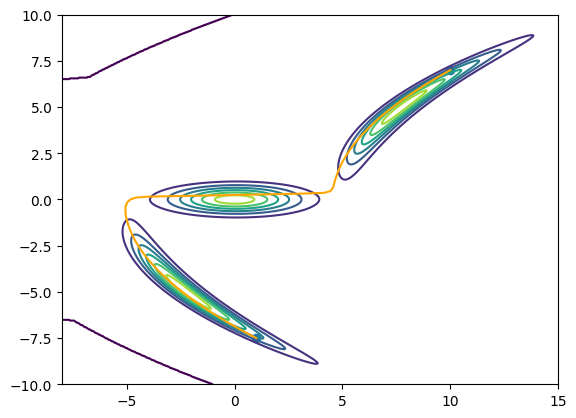

In [13]:
# test interpolation
t = torch.linspace(0.,1.,200)

geodesic_x0_x1 = double_banana_manifold.geodesic(x0, x1, t, 
                                   num_intervals=num_bv_intervals, num_epochs=num_bv_epochs, lr=bv_lr,
                                   num_sines=num_sines).detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.plot(geodesic_x0_x1[:,0], geodesic_x0_x1[:,1], color="orange")
plt.scatter(torch.tensor([x0[0], x1[0]]), torch.tensor([x0[1], x1[1]]))
plt.savefig("results/quadratic_triple_banana/geodesic.eps")
plt.show()

# TODO make second plot with decision boundaries so that we can clearly see that we really only have weird geodesics on the boundary region

Epoch 0, Loss 46.7703971862793, Validation 83.59716796875
Epoch 10, Loss 27.13387680053711, Validation 314.82135009765625
Epoch 20, Loss 17.644834518432617, Validation 176.23544311523438
Epoch 30, Loss 16.355876922607422, Validation 108.93646240234375
Epoch 40, Loss 12.72783374786377, Validation 51.26856994628906
Epoch 50, Loss 9.594427108764648, Validation 16.638168334960938
Epoch 60, Loss 9.688034057617188, Validation 17.787010192871094
Epoch 70, Loss 9.50395393371582, Validation 17.771896362304688
Epoch 80, Loss 9.424954414367676, Validation 14.869247436523438
Epoch 90, Loss 9.391067504882812, Validation 15.146156311035156
Epoch 0, Loss 106.18563842773438, Validation 18.102577209472656
Epoch 10, Loss 89.75756072998047, Validation 3.5436477661132812
Epoch 20, Loss 88.44306182861328, Validation 1.5106658935546875
Epoch 30, Loss 88.0054702758789, Validation 1.050079345703125
Epoch 40, Loss 87.8492431640625, Validation 0.8594894409179688
Epoch 50, Loss 87.68437194824219, Validation 0.52

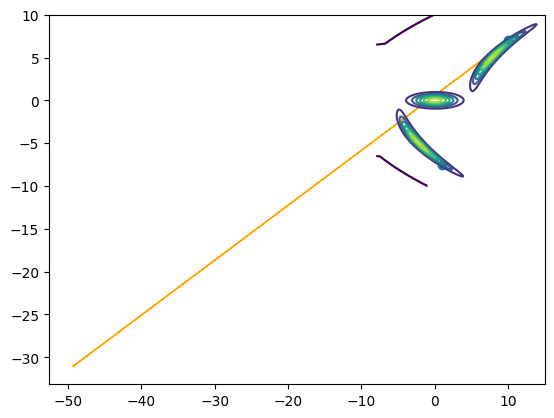

In [14]:
# test logarithmic mapping

logarithmic_x0_x1 = double_banana_manifold.log(x0,x1[None],
                                 num_intervals=num_bv_intervals, num_epochs=num_bv_epochs, lr=bv_lr,
                                 num_sines=num_sines)[0].detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.arrow(x0[0], x0[1], logarithmic_x0_x1[0], logarithmic_x0_x1[1], head_width=0.2, color="orange")
plt.scatter(torch.tensor([x0[0], x1[0]]), torch.tensor([x0[1], x1[1]]))
plt.savefig("results/quadratic_triple_banana/logarithmic.eps")
plt.show()

updating entry 0
updating entry 10
updating entry 20
updating entry 30
updating entry 40
updating entry 50
updating entry 60
updating entry 70
updating entry 80
updating entry 90
updating entry 100
updating entry 110
updating entry 120
updating entry 130
updating entry 140
updating entry 150
updating entry 160
updating entry 170
updating entry 180
updating entry 190
updating entry 200
updating entry 210
updating entry 220
updating entry 230
updating entry 240
updating entry 250
updating entry 260
updating entry 270
updating entry 280
updating entry 290
updating entry 300
updating entry 310
updating entry 320
updating entry 330
updating entry 340
updating entry 350
updating entry 360
updating entry 370
updating entry 380
updating entry 390


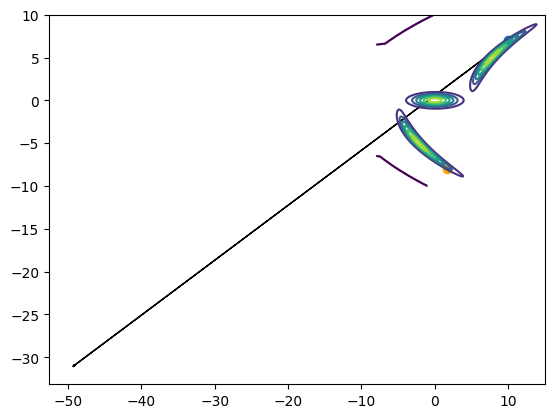

The error between exp_x0(log_x0 (x1)) and x1 is 0.8305678963661194


In [16]:
# test exponential mapping
exponential_to_x1 = double_banana_manifold.exp(x0,torch.tensor(logarithmic_x0_x1)[None], num_intervals=num_iv_intervals)[0].detach().numpy()

plt.contour(x_grid, y_grid, density_banana)
plt.scatter(x0[0], x0[1])
plt.arrow(x0[0], x0[1], logarithmic_x0_x1[0], logarithmic_x0_x1[1], head_width=0.2)
plt.scatter(exponential_to_x1[0], exponential_to_x1[1], color="orange")
plt.savefig("results/quadratic_triple_banana/exponential.eps")
plt.show()
print(f"The error between exp_x0(log_x0 (x1)) and x1 is {torch.norm(torch.tensor(exponential_to_x1) - x1)}")

In [17]:
# test distance
l2_distance = torch.norm(x0 - x1)
distance = double_banana_manifold.distance(x0[None,None], x1[None,None])[0,0,0]
print(l2_distance)
print(distance)

Epoch 0, Loss 46.7703971862793, Validation 83.59716796875
Epoch 10, Loss 45.78099060058594, Validation 159.236328125
Epoch 20, Loss 43.588653564453125, Validation 410.239990234375
Epoch 30, Loss 40.87687301635742, Validation 757.35888671875
Epoch 40, Loss 40.503021240234375, Validation 832.2669677734375
Epoch 50, Loss 39.11040115356445, Validation 806.225830078125
Epoch 60, Loss 38.6165771484375, Validation 787.165283203125
Epoch 70, Loss 38.45088577270508, Validation 772.9315185546875
Epoch 80, Loss 38.3863525390625, Validation 770.5089111328125
Epoch 90, Loss 38.37416076660156, Validation 771.98974609375
Epoch 0, Loss 2386.20947265625, Validation 899.6444091796875
Epoch 10, Loss 1660.3662109375, Validation 172.0267333984375
Epoch 20, Loss 1615.3890380859375, Validation 138.5323486328125
Epoch 30, Loss 1590.7099609375, Validation 111.981201171875
Epoch 40, Loss 1594.2657470703125, Validation 117.420166015625
Epoch 50, Loss 1581.486572265625, Validation 102.23583984375
Epoch 60, Loss 1

Epoch 0, Loss 46.7703971862793, Validation 83.59716796875
Epoch 10, Loss 27.13387680053711, Validation 314.82135009765625
Epoch 20, Loss 17.644834518432617, Validation 176.23544311523438
Epoch 30, Loss 16.355876922607422, Validation 108.93646240234375
Epoch 40, Loss 12.72783374786377, Validation 51.26856994628906
Epoch 50, Loss 9.594427108764648, Validation 16.638168334960938
Epoch 60, Loss 9.688034057617188, Validation 17.787010192871094
Epoch 70, Loss 9.50395393371582, Validation 17.771896362304688
Epoch 80, Loss 9.424954414367676, Validation 14.869247436523438
Epoch 90, Loss 9.391067504882812, Validation 15.146156311035156
Epoch 0, Loss 106.18563842773438, Validation 18.102577209472656
Epoch 10, Loss 89.75756072998047, Validation 3.5436477661132812
Epoch 20, Loss 88.44306182861328, Validation 1.5106658935546875
Epoch 30, Loss 88.0054702758789, Validation 1.050079345703125
Epoch 40, Loss 87.8492431640625, Validation 0.8594894409179688
Epoch 50, Loss 87.68437194824219, Validation 0.52

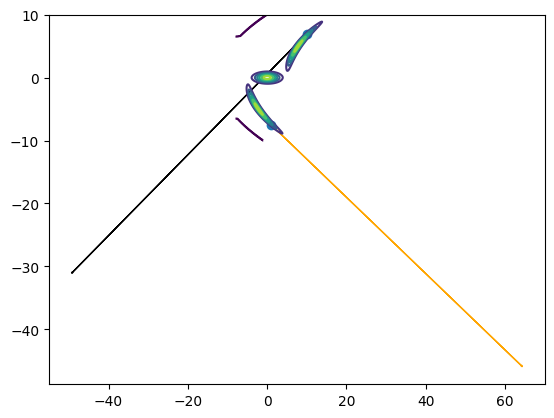

In [18]:
# test parallel transport
parallel_transport = double_banana_manifold.parallel_transport(x0, torch.tensor(logarithmic_x0_x1)[None], x1, 
                                                 num_bv_intervals=num_bv_intervals, num_bv_epochs=num_bv_epochs, bv_lr=bv_lr,
                                                 num_iv_intervals=num_iv_intervals, 
                                                 num_sines=num_sines)[0] # TODO add bins

plt.contour(x_grid, y_grid, density_banana)
plt.scatter(torch.tensor([x0[0], x1[0]]), torch.tensor([x0[1], x1[1]]))
plt.arrow(x0[0], x0[1], logarithmic_x0_x1[0], logarithmic_x0_x1[1], head_width=0.2)
plt.arrow(x1[0], x1[1], parallel_transport[0], parallel_transport[1], head_width=0.2, color="orange")
plt.savefig("results/quadratic_triple_banana/parallel-transport.eps")
plt.show()


minimal curvature = -1858.8900146484375 and maximal curvature = 72.31524658203125


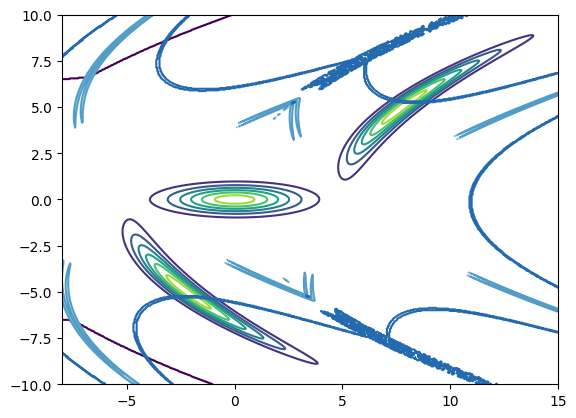

In [ ]:
ricci_scalar = double_banana_manifold.ricci_scalar(xy_grid.reshape(-1,2)).reshape(x_grid.shape)

print(f"minimal curvature = {ricci_scalar.min()} and maximal curvature = {ricci_scalar.max()}")

log_squared_ricci_scalar = torch.log(ricci_scalar **2)

plt.contour(x_grid, y_grid, density_banana)
# plt.contour(x_grid, y_grid, ricci_scalar, cmap='RdBu')
plt.contour(x_grid, y_grid, log_squared_ricci_scalar, cmap='RdBu')
plt.savefig("results/quadratic_triple_banana/ricci-scalar.eps")
plt.show()